In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_ground_truth = pd.read_csv("C:/Users/desktop-pc/Downloads/ISIC2019/ISIC_2019_Training_GroundTruth.csv")
df_ground_truth.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
outcomes = df_ground_truth.drop(['image'], axis=1).sum(axis = 0) 
outcomes

MEL      4522.0
NV      12875.0
BCC      3323.0
AK        867.0
BKL      2624.0
DF        239.0
VASC      253.0
SCC       628.0
UNK         0.0
dtype: float64

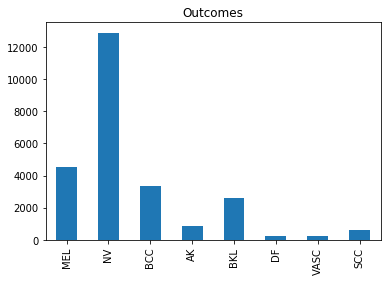

In [3]:
outcomes = outcomes.drop(labels=['UNK']).astype(float) # UNK is the unknown outcome with zero instances
hist = outcomes.plot(kind='bar', title='Outcomes')
plt.savefig('histogram.png')

In [4]:
df_ground_truth.loc[df_ground_truth['MEL'] == 1.0, 'outcome'] = 'MEL'   # Dermatofibroma
df_ground_truth.loc[df_ground_truth['NV'] == 1.0, 'outcome'] = 'NV'     # Melanocytic nevi
df_ground_truth.loc[df_ground_truth['BCC'] == 1.0, 'outcome'] = 'BCC'   # Basal cell carcinoma
df_ground_truth.loc[df_ground_truth['AK'] == 1.0, 'outcome'] = 'AK'     # Actinic keratoses
df_ground_truth.loc[df_ground_truth['BKL'] == 1.0, 'outcome'] = 'BKL'   # Benign keratosis-like lesions
df_ground_truth.loc[df_ground_truth['DF'] == 1.0, 'outcome'] = 'DF'     # Dermatofibroma
df_ground_truth.loc[df_ground_truth['VASC'] == 1.0, 'outcome'] = 'VASC' # Vascular lesions
df_ground_truth.loc[df_ground_truth['SCC'] == 1.0, 'outcome'] = 'SCC' 
df_ground_truth = df_ground_truth.drop(['MEL','NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK'], axis=1)

lesion_type_dict = {'AK': 0, 'BCC': 1, 'BKL': 2, 'MEL': 3, 'NV': 4, 'VASC': 5, 'DF': 6, 'SCC': 7}
df_ground_truth["outcome_idx"] = df_ground_truth["outcome"].map(lesion_type_dict)

df_ground_truth

,image,outcome,outcome_idx
0,ISIC_0000000,NV,4
1,ISIC_0000001,NV,4
2,ISIC_0000002,MEL,3
3,ISIC_0000003,NV,4
4,ISIC_0000004,MEL,3
...,...,...,...
25326,ISIC_0073247,BCC,1
25327,ISIC_0073248,BKL,2
25328,ISIC_0073249,MEL,3
25329,ISIC_0073251,NV,4


Reminder: Do a data analysis on metadata

In [5]:
df_metadata = pd.read_csv("C:/Users/desktop-pc/Downloads/ISIC2019/ISIC_2019_Training_Metadata.csv")
df_metadata.head()

,image,age_approx,anatom_site_general,lesion_id,sex
0,ISIC_0000000,55.0,anterior torso,NaN,female
1,ISIC_0000001,30.0,anterior torso,NaN,female
2,ISIC_0000002,60.0,upper extremity,NaN,female
3,ISIC_0000003,30.0,upper extremity,NaN,male
4,ISIC_0000004,80.0,posterior torso,NaN,male


In [6]:
df = df_metadata.merge(df_ground_truth, on='image')
df.head()

,image,age_approx,anatom_site_general,lesion_id,sex,outcome,outcome_idx
0,ISIC_0000000,55.0,anterior torso,NaN,female,NV,4
1,ISIC_0000001,30.0,anterior torso,NaN,female,NV,4
2,ISIC_0000002,60.0,upper extremity,NaN,female,MEL,3
3,ISIC_0000003,30.0,upper extremity,NaN,male,NV,4
4,ISIC_0000004,80.0,posterior torso,NaN,male,MEL,3


In [7]:
df.tail()

,image,age_approx,anatom_site_general,lesion_id,sex,outcome,outcome_idx
25326,ISIC_0073247,85.0,head/neck,BCN_0003925,female,BCC,1
25327,ISIC_0073248,65.0,anterior torso,BCN_0001819,male,BKL,2
25328,ISIC_0073249,70.0,lower extremity,BCN_0001085,male,MEL,3
25329,ISIC_0073251,55.0,palms/soles,BCN_0002083,female,NV,4
25330,ISIC_0073254,50.0,upper extremity,BCN_0001079,male,BKL,2


In [8]:
import glob, os

train_folder = 'C:/Users/desktop-pc/Downloads/ISIC2019/ISIC_2019_Training_Input/'

files_in_train = sorted(os.listdir(train_folder))
for i in files_in_train:
    if not(i.endswith(".jpg")): 
        files_in_train.remove(i)
        
df.sort_values(by=['image'])
df['path'] = [train_folder+str(x) for x in files_in_train]
df.to_csv('isic2019.csv', index_label= 'index')
df.head()

,image,age_approx,anatom_site_general,lesion_id,sex,outcome,outcome_idx,path
0,ISIC_0000000,55.0,anterior torso,NaN,female,NV,4,C:/Users/desktop-pc/Downloads/ISIC2019/ISIC_20...
1,ISIC_0000001,30.0,anterior torso,NaN,female,NV,4,C:/Users/desktop-pc/Downloads/ISIC2019/ISIC_20...
2,ISIC_0000002,60.0,upper extremity,NaN,female,MEL,3,C:/Users/desktop-pc/Downloads/ISIC2019/ISIC_20...
3,ISIC_0000003,30.0,upper extremity,NaN,male,NV,4,C:/Users/desktop-pc/Downloads/ISIC2019/ISIC_20...
4,ISIC_0000004,80.0,posterior torso,NaN,male,MEL,3,C:/Users/desktop-pc/Downloads/ISIC2019/ISIC_20...


In [9]:
df.shape

(25331, 8)